In [3]:
#mount the google drive to colab notebook for getting data
from google.colab import drive
 
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
#check the properties file whether it is placed in drive or not
!ls '/content/drive/My Drive/Colab Notebooks/twitter.properties'

'/content/drive/My Drive/Colab Notebooks/twitter.properties'


In [4]:
#installing ConfigParser
!pip install ConfigParser

You should consider upgrading via the 'C:\Users\Sai Akshitha Gandham\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#this should be the format in twitter.properties file

[twitter]
accesstoken=xxxx

accesstokensecret=xxxx

apikey=xxxxxx

apisecretkey=xxxxxx


In [5]:
#check whether our required file there or not
import configparser
config = configparser.RawConfigParser()
config.read('/content/drive/My Drive/Colab Notebooks/twitter.properties')

print(config.sections());

[]


In [6]:
#getting the api keys through config
accesstoken=config.get('twitter', 'accesstoken')
accesstokensecret=config.get('twitter', 'accesstokensecret')
apikey=config.get('twitter', 'apikey')
apisecretkey=config.get('twitter', 'apisecretkey')

NoSectionError: No section: 'twitter'



```
# This is formatted as code
```

Above process is to use keys from drive securely

In [ ]:
#simpler way to do this taks wihtout accessing the keys remotely

In [ ]:
#importing required modules
import os
import tweepy as tw

#this should be the format 

accesstoken='xxxx'

accesstokensecret='xxxx'

apikey='xxxxxx'

apisecretkey='xxxxxx'


in order to get keys we should create Dev account on twitter
https://developer.twitter.com/en/apply-for-access


In [ ]:
   #making a connection
auth = tw.OAuthHandler(apikey, apisecretkey)

auth.set_access_token(accesstoken, accesstokensecret)

api = tw.API(auth, wait_on_rate_limit=True)

#https://developer.twitter.com/en/docs/twitter-api/v1/rate-limits
#https://docs.tweepy.org/en/v3.5.0/api.html

In [ ]:
#place the hashtag  and date you want to know about the trend or sentiment
search_words = "#covid19"
date_since = "2021-05-13"

In [ ]:
#getting 100 tweets per search
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

#https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html

In [ ]:
tweets

In [ ]:
#getting only required cloumns for our need
tweet_details = [[tweet.text, tweet.user.screen_name, tweet.user.location, tweet.source ] for tweet in tweets]
#tweet_details , tweet.source ,"Device"

In [ ]:
tweet_details

[['RT @RadioChinar: Since childhood, we enthusiastically wait for #EidCelebrations and Eidi every year. But this year, amid #COVID19 for well…',
  'RohitKu10100420',
  '',
  'Twitter for Android'],
 ['RT @khalsaaid_india: #InternationalNursesDay \n\nOur gesture of appreciation to our unsung heroes, our Nurses who are working mechanically da…',
  'JASVIRS29320775',
  '',
  'Twitter for Android'],
 ['RT @LiceMovono: Fiji has had 165 cases, 109 recoveries and 4 deaths.  - Dr. @AalishaSahukhan #FijiNews #COVID19Fiji #COVID19',
  'itsjustlido_xo',
  '',
  'Twitter for iPhone'],
 ['RT @YashhD_FC: Free Oxygen cylinder service for #COVID19 patients who cannot afford it.\nWhatsApp: 9330058908\n#COVIDEmergency #KolkataCovidR…',
  'YashianBarnali',
  'Tarakeswar, India',
  'Twitter for Android'],
 ["RT @HelenBranswell: 1. Interesting presentation to ACIP on cases of TTS following J&amp;J's #Covid19 vaccine. TTS = thrombosis with thrombocyto…",
  'Toetterbeck',
  'After 40 years away now FRG',
  '

In [ ]:
import pandas as pd

In [ ]:
#making a dataframe
tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user', "location", "Device"])

In [ ]:
#pd.set_option('max_rowwidth', 800)
#check dataframe
tweet_df.head(5)

,text,user,location,Device
0,"RT @RadioChinar: Since childhood, we enthusias...",RohitKu10100420,,Twitter for Android
1,RT @khalsaaid_india: #InternationalNursesDay \...,JASVIRS29320775,,Twitter for Android
2,"RT @LiceMovono: Fiji has had 165 cases, 109 re...",itsjustlido_xo,,Twitter for iPhone
3,RT @YashhD_FC: Free Oxygen cylinder service fo...,YashianBarnali,"Tarakeswar, India",Twitter for Android
4,RT @HelenBranswell: 1. Interesting presentatio...,Toetterbeck,After 40 years away now FRG,Twitter for iPhone


In [ ]:
tweet_df.to_csv('tweets1.csv')

In [ ]:
!ls

sample_data  tweets100.csv  tweets1.csv  tweets.csv


In [ ]:
#most frequent location
tweet_df.Device.value_counts()

Twitter for Android    59
Twitter Web App        20
Twitter for iPhone     17
luxhq2                  2
TweetDeck               1
Naattuvartha            1
Name: Device, dtype: int64

In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 27.3MB/s 


In [ ]:
#for extracting emojis from data
import emoji

In [ ]:
tweet_df.head(5)

,text,user,location,Device
0,"RT @RadioChinar: Since childhood, we enthusias...",RohitKu10100420,,Twitter for Android
1,RT @khalsaaid_india: #InternationalNursesDay \...,JASVIRS29320775,,Twitter for Android
2,"RT @LiceMovono: Fiji has had 165 cases, 109 re...",itsjustlido_xo,,Twitter for iPhone
3,RT @YashhD_FC: Free Oxygen cylinder service fo...,YashianBarnali,"Tarakeswar, India",Twitter for Android
4,RT @HelenBranswell: 1. Interesting presentatio...,Toetterbeck,After 40 years away now FRG,Twitter for iPhone


In [ ]:
#cleaning unnecessary like RT,\n,emojis wtc from data
import re

def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return text

In [ ]:
#applying clening function on tweet column
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

NameError: name 'tweet_df' is not defined

In [ ]:
tweet_df.head()

,text,user,location,Device
0,"Since childhood, we enthusiastically wait for...",RohitKu10100420,,Twitter for Android
1,#InternationalNursesDay Our gesture of apprec...,JASVIRS29320775,,Twitter for Android
2,"Fiji has had 165 cases, 109 recoveries and 4 ...",itsjustlido_xo,,Twitter for iPhone
3,Free Oxygen cylinder service for #COVID19 pat...,YashianBarnali,"Tarakeswar, India",Twitter for Android
4,1. Interesting presentation to ACIP on cases ...,Toetterbeck,After 40 years away now FRG,Twitter for iPhone


In [ ]:
#saving for future requirement 
tweet_df.to_csv('tweets_clean.csv')

In [ ]:
#lets check whether it is saved or not
!ls

sample_data  tweets100.csv  tweets1.csv  tweets_clean.csv  tweets.csv


In [ ]:
#importing spacy
import spacy 

nlp = spacy.load('en_core_web_sm') 

#https://spacy.io/usage/models

In [ ]:
#getting entities from text
tweet_df['text'].apply(lambda x: [print("\tText : {},  Entity : {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else ""  for ent in nlp(x).ents])

	Text : EidCelebrations,  Entity : PERSON
	Text : Eidi,  Entity : ORG
	Text : every year,  Entity : DATE
	Text : this year,  Entity : DATE
	Text : Fiji,  Entity : GPE
	Text : 165,  Entity : CARDINAL
	Text : 109,  Entity : CARDINAL
	Text : 4,  Entity : CARDINAL
	Text : Free Oxygen,  Entity : ORG
	Text : WhatsApp,  Entity : ORG
	Text : KolkataCovidR,  Entity : PERSON
	Text : 1,  Entity : CARDINAL
	Text : J&amp;J,  Entity : PERSON
	Text : TTS,  Entity : ORG
	Text : Jyotika,  Entity : PERSON
	Text : One,  Entity : CARDINAL
	Text : josh,  Entity : PERSON
	Text : COVID19,  Entity : MONEY
	Text : six to eight weeks,  Entity : DATE
	Text : Situation Under Control”-,  Entity : WORK_OF_ART
	Text : Telangana,  Entity : PERSON
	Text : India,  Entity : GPE
	Text : 500,  Entity : CARDINAL
	Text : GTB Hospital,  Entity : ORG
	Text : 15,  Entity : CARDINAL
	Text : Muslim,  Entity : NORP
	Text : Celebrate this Great Ramzan,  Entity : PERSON
	Text : Awareness Campaign,  Entity : ORG
	Text : Medica,  Ent

0       [None, None, None, None]
1                             []
2     [None, None, None, None, ]
3             [None, None, None]
4             [None, None, None]
                 ...            
95            [None, None, None]
96      [None, None, None, None]
97                            []
98                  [None, None]
99            [None, None, None]
Name: text, Length: 100, dtype: object

In [ ]:
#assigning entitties into dataframe

tweet_df['entities']  = tweet_df['text'].apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

In [ ]:
pd.set_option('max_colwidth',800)

tweet_df.head(5)

,text,user,location,Device,entities
0,"Since childhood, we enthusiastically wait for #EidCelebrations and Eidi every year. But this year, amid #COVID19 for well…",RohitKu10100420,,Twitter for Android,"[(EidCelebrations, PERSON), (Eidi, ORG), (every year, DATE), (this year, DATE)]"
1,"#InternationalNursesDay Our gesture of appreciation to our unsung heroes, our Nurses who are working mechanically da…",JASVIRS29320775,,Twitter for Android,[]
2,"Fiji has had 165 cases, 109 recoveries and 4 deaths. - Dr. #FijiNews #COVID19Fiji #COVID19",itsjustlido_xo,,Twitter for iPhone,"[(Fiji, GPE), (165, CARDINAL), (109, CARDINAL), (4, CARDINAL), ]"
3,Free Oxygen cylinder service for #COVID19 patients who cannot afford it.WhatsApp: 9330058908#COVIDEmergency #KolkataCovidR…,YashianBarnali,"Tarakeswar, India",Twitter for Android,"[(Free Oxygen, ORG), (WhatsApp, ORG), (KolkataCovidR, PERSON)]"
4,1. Interesting presentation to ACIP on cases of TTS following J&amp;J's #Covid19 vaccine. TTS = thrombosis with thrombocyto…,Toetterbeck,After 40 years away now FRG,Twitter for iPhone,"[(1, CARDINAL), (J&amp;J, PERSON), (TTS, ORG)]"


In [ ]:
#importing SentimentIntensityAnalyzer for sentiment
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
#loading object
sid = SentimentIntensityAnalyzer()

In [ ]:
#applying on new sentiment column 
tweet_df['sentiment'] = tweet_df['text'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
pd.set_option('max_colwidth',800)

tweet_df.head(5)

,text,user,location,Device,entities,sentiment
0,"Since childhood, we enthusiastically wait for #EidCelebrations and Eidi every year. But this year, amid #COVID19 for well…",RohitKu10100420,,Twitter for Android,"[(EidCelebrations, PERSON), (Eidi, ORG), (every year, DATE), (this year, DATE)]","{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}"
1,"#InternationalNursesDay Our gesture of appreciation to our unsung heroes, our Nurses who are working mechanically da…",JASVIRS29320775,,Twitter for Android,[],"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}"
2,"Fiji has had 165 cases, 109 recoveries and 4 deaths. - Dr. #FijiNews #COVID19Fiji #COVID19",itsjustlido_xo,,Twitter for iPhone,"[(Fiji, GPE), (165, CARDINAL), (109, CARDINAL), (4, CARDINAL), ]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,Free Oxygen cylinder service for #COVID19 patients who cannot afford it.WhatsApp: 9330058908#COVIDEmergency #KolkataCovidR…,YashianBarnali,"Tarakeswar, India",Twitter for Android,"[(Free Oxygen, ORG), (WhatsApp, ORG), (KolkataCovidR, PERSON)]","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}"
4,1. Interesting presentation to ACIP on cases of TTS following J&amp;J's #Covid19 vaccine. TTS = thrombosis with thrombocyto…,Toetterbeck,After 40 years away now FRG,Twitter for iPhone,"[(1, CARDINAL), (J&amp;J, PERSON), (TTS, ORG)]","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}"


In [ ]:
#extracting compound score in new column compound
tweet_df['compound']  = tweet_df['sentiment'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
tweet_df.head(5)

,text,user,location,Device,entities,sentiment,compound
0,"Since childhood, we enthusiastically wait for #EidCelebrations and Eidi every year. But this year, amid #COVID19 for well…",RohitKu10100420,,Twitter for Android,"[(EidCelebrations, PERSON), (Eidi, ORG), (every year, DATE), (this year, DATE)]","{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}",0.5574
1,"#InternationalNursesDay Our gesture of appreciation to our unsung heroes, our Nurses who are working mechanically da…",JASVIRS29320775,,Twitter for Android,[],"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}",0.7650
2,"Fiji has had 165 cases, 109 recoveries and 4 deaths. - Dr. #FijiNews #COVID19Fiji #COVID19",itsjustlido_xo,,Twitter for iPhone,"[(Fiji, GPE), (165, CARDINAL), (109, CARDINAL), (4, CARDINAL), ]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,Free Oxygen cylinder service for #COVID19 patients who cannot afford it.WhatsApp: 9330058908#COVIDEmergency #KolkataCovidR…,YashianBarnali,"Tarakeswar, India",Twitter for Android,"[(Free Oxygen, ORG), (WhatsApp, ORG), (KolkataCovidR, PERSON)]","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}",0.5106
4,1. Interesting presentation to ACIP on cases of TTS following J&amp;J's #Covid19 vaccine. TTS = thrombosis with thrombocyto…,Toetterbeck,After 40 years away now FRG,Twitter for iPhone,"[(1, CARDINAL), (J&amp;J, PERSON), (TTS, ORG)]","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}",0.4019


In [ ]:
tweet_df['comp_score'] = tweet_df['compound'].apply(lambda c: 'neu' if c ==0.5 else ('pos' if c>=0.5 else 'neg'))

In [ ]:
#dividing neg or pos sentiment based on compound
#tweet_df['comp_score'] = tweet_df['compound'].apply(lambda c: 'pos' if c >=0.5 else 'neg')

tweet_df.head(5)

,text,user,location,Device,entities,sentiment,compound,comp_score
0,"Since childhood, we enthusiastically wait for #EidCelebrations and Eidi every year. But this year, amid #COVID19 for well…",RohitKu10100420,,Twitter for Android,"[(EidCelebrations, PERSON), (Eidi, ORG), (every year, DATE), (this year, DATE)]","{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}",0.5574,pos
1,"#InternationalNursesDay Our gesture of appreciation to our unsung heroes, our Nurses who are working mechanically da…",JASVIRS29320775,,Twitter for Android,[],"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}",0.7650,pos
2,"Fiji has had 165 cases, 109 recoveries and 4 deaths. - Dr. #FijiNews #COVID19Fiji #COVID19",itsjustlido_xo,,Twitter for iPhone,"[(Fiji, GPE), (165, CARDINAL), (109, CARDINAL), (4, CARDINAL), ]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neg
3,Free Oxygen cylinder service for #COVID19 patients who cannot afford it.WhatsApp: 9330058908#COVIDEmergency #KolkataCovidR…,YashianBarnali,"Tarakeswar, India",Twitter for Android,"[(Free Oxygen, ORG), (WhatsApp, ORG), (KolkataCovidR, PERSON)]","{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}",0.5106,pos
4,1. Interesting presentation to ACIP on cases of TTS following J&amp;J's #Covid19 vaccine. TTS = thrombosis with thrombocyto…,Toetterbeck,After 40 years away now FRG,Twitter for iPhone,"[(1, CARDINAL), (J&amp;J, PERSON), (TTS, ORG)]","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}",0.4019,neg


In [ ]:
#sentiment frequency
tweet_df.comp_score.value_counts()

neg    84
pos    16
Name: comp_score, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

neg    84
pos    16
Name: comp_score, dtype: int64


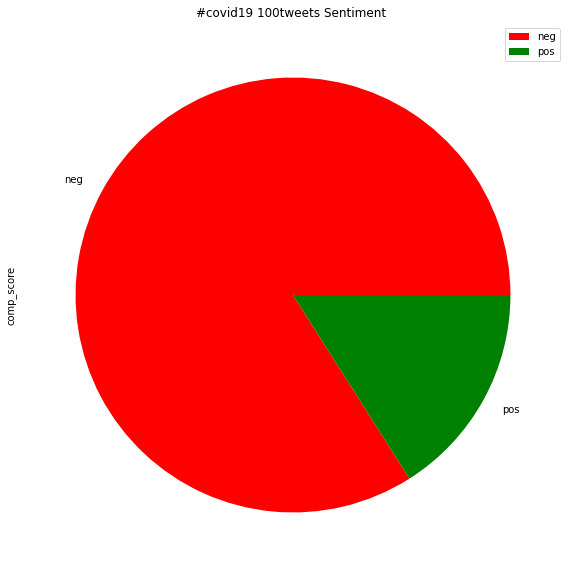

In [ ]:
# Create a data frame of adjudicated_gradable counts 
vc = tweet_df.comp_score.value_counts()
print(vc)

# Plot a pie chart

vc.plot(kind='pie', title='#covid19 100tweets Sentiment ', colors = ['red','green'], figsize=(10,10)) 

plt.legend()
plt.show()

In [ ]:
#import required packages
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


# #making a connection
# auth = tw.OAuthHandler(apikey, apisecretkey)
# auth.set_access_token(accesstoken, accesstokensecret)
# api = tw.API(auth, wait_on_rate_limit=True)


In [ ]:
# #Define a search-for-tweets function

# def tweetSearch(query, limit = 100, language = "en", remove = []):
#     #Create an empty text holder
#     text = ""
#     for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(limit):
#         text += tweet.text.lower()

#  #Create a list of words to be removed
#     removeWords = ["https","co"]
#     removeWords += remove
    
#  #Replace the words that you would like to removed with an empty space.
#     for word in removeWords:
#         text = text.replace(word, "")
    
#  #returnclean text
#     return text

In [ ]:
text = " ".join(review for review in tweet_df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 11397 words in the combination of all review.


In [ ]:
#search = tweetSearch("covid19")
wordcloud = WordCloud().generate(text)

In [ ]:
wordcloud

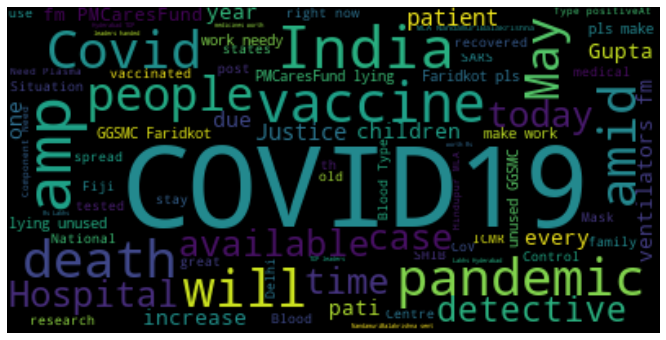

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#search = tweetSearch("pawankalyan")